In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':22})
%matplotlib inline
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
%config InlineBackend.figure_format = 'retina'
import pandas as pd

# Set the font family to Cmr10
plt.rcParams['font.family'] = 'Cmr10'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Cmr10'
plt.rcParams['mathtext.it'] = 'Cmr10:italic'
plt.rcParams['mathtext.bf'] = 'Cmr10:bold'

plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False

from mpmath import *

In [2]:
df = pd.read_csv('BlenData.csv',  names=('time', 'angle'), usecols=(0, 1))

df.angle = np.arcsin(df.angle / 0.8 / 100)

df.head()

,time,angle
0,0.00,0.000000
1,0.03,0.037008
2,0.07,0.053651
3,0.10,0.074694
4,0.13,0.136675


In [3]:
g = 9.81137 # Acceleration due to gravity
L, W = 1.672, 0.01598 # Length and width of rod
r_1, r_2 = 0.04701, 0.04701 # Radii of the cylinders
P_1, P_2 = 0.338, 1.3324 # Positions of the knife edges
m_1, x_1 = 1.261, L/2 # Mass of the rod and its centre of mass
m_2, x_2 = 1.00256, 0.088 # Mass of the first cylinder and its centre of mass
m_3, x_3 = 1.4048, 1.138 # Mass of the second cylinder and its centre of mass
M = m_1 + m_2 + m_3 # Total mass
C_of_M = (m_1 * x_1 + m_2 * x_2 + m_3 * x_3) / M # Centre of mass position
l_1, l_2 = C_of_M - P_1, P_2 - C_of_M # Distances from pivot to centre of mass
R_1 = C_of_M - x_1 # Distances between centre of mass and the centres of mass of the the rod and two cylinders
R_2 = C_of_M - x_2 
R_3 = C_of_M - x_3 
I_c = 1/12 * m_1 * (L**2 + W**2) + m_1 * R_1**2 + 1/2 * m_2 * r_1**2 + m_2 * R_2**2 + 1/2 * m_3 * r_2**2 + m_3 * R_3**2 # Inertia about the centre of mass

# Proportional to v^2

a: -9.5886 +- 0.0013, c: 0.0256 +- 0.0006


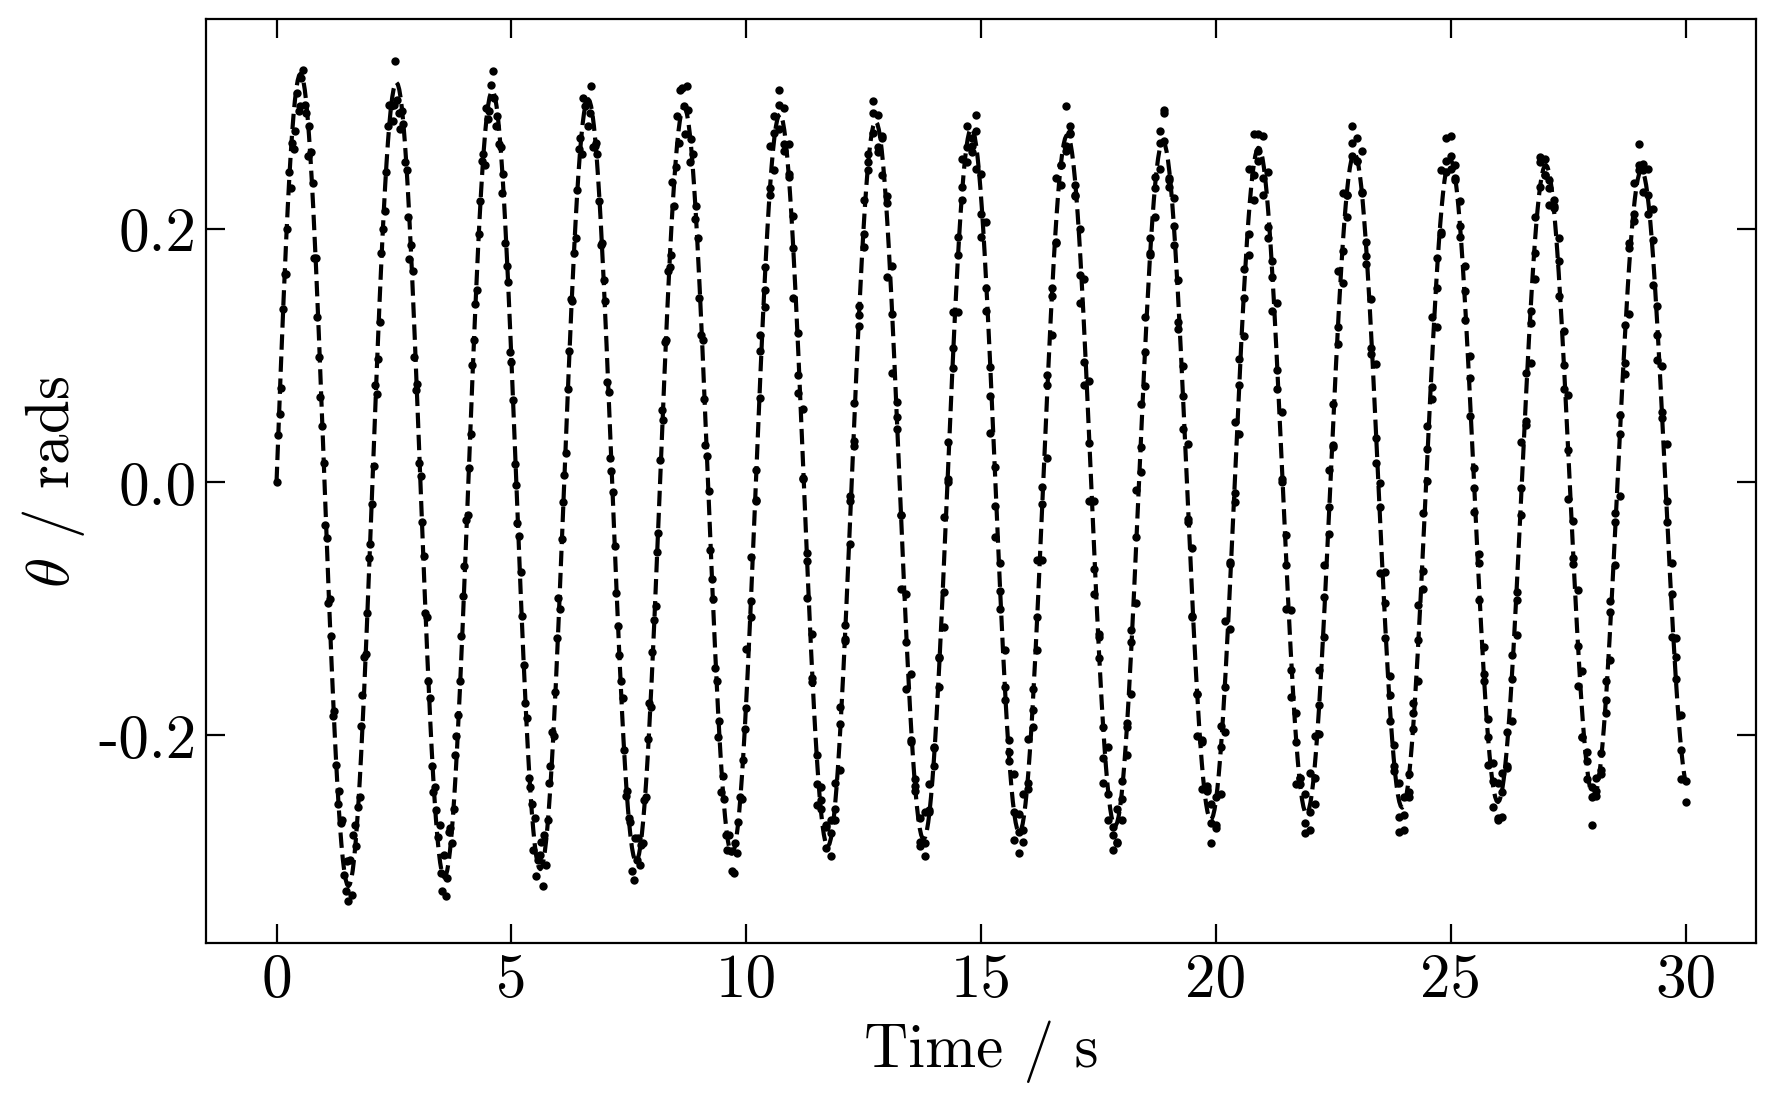

In [4]:
from scipy.integrate import odeint


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)


y0 = 0.0
z0 = 1.0

def function(x, a, c):
    def f(yz, x):
        y, z = yz
        dydx = z
        dzdx = a * np.sin(y) - c * z * abs(z)
        return [dydx, dzdx]

    yz = odeint(f, [y0, z0], x, mxstep=100000)
    y = yz[:, 0]

    return y

tol = 1e-60
# Set bounds for the parameters
bounds = ([-20, 0.01], [0, 0.3])

popt, pcov = curve_fit(function, df.time, df.angle, p0 = [-9.595, 0.025], bounds=bounds, method='trf', maxfev=100000)
a, c = popt
err_a = np.sqrt(pcov[0, 0])
err_c = np.sqrt(pcov[1, 1])

print(f'a: {a:.4f} +- {err_a:.4f}, c: {c:.4f} +- {err_c:.4f}')

x_values = np.linspace(min(df.time), max(df.time), 1000)

plt.plot(df.time, df.angle, marker='o', markersize=2, color='black', linestyle='none')
plt.plot(x_values, function(x_values, a, c), linestyle='--', color='black')
plt.xlabel('Time / s')
plt.ylabel(r'$\theta$ / rads')

plt.tick_params(direction='in',
                length=7,
                bottom='on',
                left='on',
                top='on',
                right='on',
               )

plt.show()

In [5]:
fig.savefig('figures/PenDrag.png', dpi=300)